In [43]:
import pandas as pd
import numpy as np
import os
import json

In [44]:
data = pd.read_excel('../src/data/online_retail_II.xlsx', dtype='object')

data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


In [45]:
data['Customer ID'] = np.where(data['Customer ID'].isna(), '99999', data['Customer ID'])

data.loc[data['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [46]:
def save_query(query, filename, directory):
    BASE_DIR = 'querys'
    
    directory = os.path.join('.', BASE_DIR, directory)
    
    if not os.path.exists(directory):
        os.makedirs(directory)

    with open(os.path.join(directory, filename+'.sql'), 'a', encoding='utf-8') as f:
        f.write(query+'\n')


In [60]:
customers = None
customers = data.loc[~data.duplicated(subset=['Customer ID'], keep='first')][['Customer ID', 'Country']].copy()
customers['Customer ID'] = customers['Customer ID'].astype(str).str.strip()

for customer in customers.to_dict('records'):
    query = f"""INSERT INTO public.customers
(id, country)
VALUES({str(customer["Customer ID"])}, '{customer["Country"]}');"""
    save_query(query, directory='orders_data', filename='customer_insert')

customers

,Customer ID,Country
0,13085,United Kingdom
12,13078,United Kingdom
31,15362,United Kingdom
54,18102,United Kingdom
71,12682,France
...,...,...
521212,18269,United Kingdom
522042,13270,United Kingdom
522621,12942,United Kingdom
522900,13369,United Kingdom


In [59]:
products = None
products = data.loc[~data.duplicated(subset=['StockCode'], keep='first')][['StockCode','Description', 'Price']].copy()

for product in products.to_dict("records"):
    query = f"""INSERT INTO public.products
(id, description, price)
VALUES('{str(product["StockCode"])}', '{str(product["Description"]).replace("'","")}', {float(product['Price'])});"""
    save_query(query, directory='orders_data', filename='products_insert')

products

,StockCode,Description,Price
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95
1,79323P,PINK CHERRY LIGHTS,6.75
2,79323W,WHITE CHERRY LIGHTS,6.75
3,22041,"RECORD FRAME 7"" SINGLE SIZE",2.1
4,21232,STRAWBERRY CERAMIC TRINKET BOX,1.25
...,...,...,...
520198,22937,BAKING MOULD CHOCOLATE CUPCAKES,2.55
520238,22936,BAKING MOULD ROSE WHITE CHOCOLATE,3.25
520239,22935,BAKING MOULD ROSE MILK CHOCOLATE,3.25
523069,22933,BAKING MOULD EASTER EGG MILK CHOC,2.95


In [58]:
products.loc[products["StockCode"] == 85048]

,StockCode,Description,Price
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95


In [62]:
orders = None
orders = data.loc[~data.duplicated(subset=['Invoice', 'StockCode', 'Quantity'], keep='first')][['Invoice','Customer ID', 'StockCode', 'Quantity', 'InvoiceDate']].copy()

for order in orders.to_dict('records'):
    query = f"""INSERT INTO public.orders
(id, customer_id, stock_code, quantity, invoice_date)
VALUES('{str(order['Invoice'])}', {str(order['Customer ID'])}, '{order['StockCode']}', {order['Quantity']}, '{order['InvoiceDate']}');"""
    save_query(query, directory='orders_data', filename='orders_insert')

# orders

In [50]:
data.loc[data['Customer ID'] == np.nan]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [51]:
data.columns.tolist()

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [3]:
import pandas as pd

df_pizzas = pd.read_csv('../src/data/pizzas.csv', delimiter=',', dtype='object')

df_pizzas

,diametro,preco
0,20,50
1,22,55
2,24,60
3,26,65
4,28,70
5,30,75
6,32,80
7,34,85
8,36,90
9,38,95


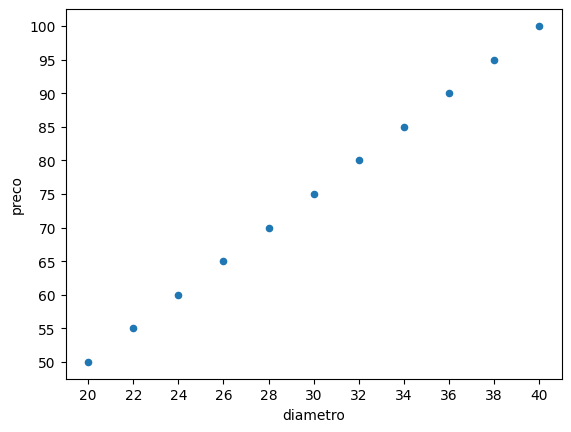

In [6]:
df_pizzas.plot(kind='scatter', x='diametro', y='preco');

In [16]:
from sklearn import linear_model

model = linear_model.LinearRegression()
x= df_pizzas[['diametro']].values
y = df_pizzas[['preco']].values

model.fit(x, y)


57.499999999999986


In [17]:

print(model.predict([[23]])[0][0])

57.499999999999986
